<a href="https://colab.research.google.com/github/emmanuelmadoery/MMM/blob/main/EDA_Meridian_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Data](https://docs.google.com/spreadsheets/d/1Vcyzv03yEWdZPppTPI0srCjVABOomzanSSbhwLd8qmE/edit?usp=drive_link)

In [ ]:
# ════════════════════════
# IMPORTACIÓN DE LIBRERÍAS
# ════════════════════════

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import ccf
from statsmodels.tools.tools import add_constant

# Configuración de estilo visual
sns.set(style="whitegrid")  # Mejora la legibilidad de los gráficos

In [ ]:
# ════════════════════════
# CARGA DE DATOS
# ════════════════════════

# ====================================================================================
# 💬 PROMPT ORIGINAL USADO PARA GENERAR ESTE BLOQUE
#
# "Estoy haciendo un EDA en un Google Colab. Quiero que me des el bloque de
# código para cargar un CSV, mostrar su forma y ver las primeras filas. Que esté muy
# bien comentado, estructurado por secciones y con un tono claro y profesional.
# Ideal para dar clase o documentar bien el análisis."
# ====================================================================================

# IMPORTANTE: Asegúrate de subir el archivo al entorno de ejecución.

# Carga del dataset desde CSV
df = pd.read_csv("bike_sales_data.csv")

# Verificación inicial del dataset
print("✅ Dataset cargado correctamente.")
print("Número de filas y columnas:", df.shape)

# Visualización de las primeras filas
print("\nVista previa del dataset:")
display(df.head(5))

✅ Dataset cargado correctamente.
Número de filas y columnas: (260, 9)

Vista previa del dataset:


,Week,sales,branded_search_spend,nonbranded_search_spend,facebook_spend,print_spend,ooh_spend,tv_spend,radio_spend
0,7/23/17,58850.0,1528.8,463.32,802.620,0,0,0,0
1,7/30/17,62050.0,1575.6,468.00,819.312,0,0,0,0
2,8/6/17,59388.0,1544.4,477.36,749.034,0,0,0,0
3,8/13/17,56964.0,1528.8,468.00,741.468,0,0,0,0
4,8/20/17,53460.0,1560.0,458.64,811.200,0,0,0,0


In [ ]:
# ════════════════════════
# SELECCIÓN DE VARIABLES RELEVANTES
# ════════════════════════

# ====================================================================================
# 💬 PROMPT ORIGINAL USADO PARA ESTE BLOQUE
#
# "Quiero un bloque de código para seleccionar solo las variables relevantes de mi
# dataset para hacer un modelo de marketing mix modeling. Debe incluir la selección
# explícita de variables por nombre, validación de que están presentes, y creación de
# un nuevo DataFrame filtrado. También quiero que convierta la columna 'fecha' a datetime,
# y que incluya validaciones iniciales como detección de nulos y duplicados. Que esté
# muy bien comentado, con secciones separadas y útil para usar en una clase."
# ====================================================================================

# Definimos la lista de variables que sí queremos conservar para el análisis y modelado
variables_modelo = [
    "Week",
    "branded_search_spend", "nonbranded_search_spend", "facebook_spend", "print_spend", "ooh_spend", "tv_spend", "radio_spend",  # Inversión pagada
    "sales"                                           # Target final del modelo
]

# Validamos que todas las columnas estén en el dataset original
missing_vars = [var for var in variables_modelo if var not in df.columns]
if missing_vars:
    print("⚠️ Las siguientes variables no se encuentran en el dataset:")
    print(missing_vars)
else:
    print("✅ Todas las variables seleccionadas están disponibles en el dataset.")

# Creamos un nuevo dataframe con solo las variables seleccionadas
df_modelo = df[variables_modelo].copy()

# Mostramos las primeras filas del nuevo dataset reducido
print("\nVista previa del dataset filtrado (df_modelo):")
display(df_modelo.head(5))

# ========================
# CONVERSIÓN DE FECHA
# ========================

# Comprobamos si la columna 'Week' existe
if "Week" in df_modelo.columns:
    # Convertimos a datetime para poder usarla como eje temporal
    df_modelo["Week"] = pd.to_datetime(df_modelo["Week"])
    print("\n✅ Columna 'Week' convertida a formato datetime.")
else:
    print("\n⚠️ No se encuentra la columna 'Week'. Revisa el nombre o estructura del archivo.")

# ========================
# VALIDACIONES INICIALES
# ========================

# Verificamos si hay duplicados
n_duplicados = df_modelo.duplicated().sum()
if n_duplicados > 0:
    print(f"⚠️ Atención: Se encontraron {n_duplicados} filas duplicadas.")
else:
    print("✅ No hay filas duplicadas.")

# Verificamos valores nulos por columna
nulos = df_modelo.isnull().sum()
if nulos.any():
    print("\n⚠️ Atención: Se encontraron valores nulos en las siguientes columnas:")
    print(nulos[nulos > 0])
else:
    print("✅ No hay valores nulos en el dataset.")

✅ Todas las variables seleccionadas están disponibles en el dataset.

Vista previa del dataset filtrado (df_modelo):


,Week,branded_search_spend,nonbranded_search_spend,facebook_spend,print_spend,ooh_spend,tv_spend,radio_spend,sales
0,7/23/17,1528.8,463.32,802.620,0,0,0,0,58850.0
1,7/30/17,1575.6,468.00,819.312,0,0,0,0,62050.0
2,8/6/17,1544.4,477.36,749.034,0,0,0,0,59388.0
3,8/13/17,1528.8,468.00,741.468,0,0,0,0,56964.0
4,8/20/17,1560.0,458.64,811.200,0,0,0,0,53460.0



✅ Columna 'Week' convertida a formato datetime.
✅ No hay filas duplicadas.
✅ No hay valores nulos en el dataset.


<ipython-input-4-3b61056a49eb>:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_modelo["Week"] = pd.to_datetime(df_modelo["Week"])


In [ ]:
# ════════════════════════
# ANÁLISIS DE ESTRUCTURA Y TIPOS DE DATOS
# ════════════════════════

# ====================================================================================
# 💬 PROMPT ORIGINAL USADO PARA ESTE BLOQUE
#
# "Quiero un bloque de código para analizar la estructura del DataFrame que voy a usar
# en un modelo de marketing mix modeling. Quiero que incluya un .info() para ver tipos
# de datos y si hay columnas mal formateadas, y un resumen estadístico con .describe()
# solo para las variables numéricas. El bloque debe estar bien comentado, separado en
# secciones claras y listo para usar en un EDA con fines formativos o explicativos."
# ====================================================================================

# Mostramos información estructural detallada del DataFrame
print("Información estructural del DataFrame:")
df_modelo.info()

# Mostramos un resumen estadístico solo de las variables numéricas
print("\nResumen estadístico de las variables numéricas:")
display(df_modelo.select_dtypes(include="number").describe())


Información estructural del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Week                     260 non-null    datetime64[ns]
 1   branded_search_spend     260 non-null    float64       
 2   nonbranded_search_spend  260 non-null    float64       
 3   facebook_spend           260 non-null    float64       
 4   print_spend              260 non-null    int64         
 5   ooh_spend                260 non-null    int64         
 6   tv_spend                 260 non-null    int64         
 7   radio_spend              260 non-null    int64         
 8   sales                    260 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 18.4 KB

Resumen estadístico de las variables numéricas:


,branded_search_spend,nonbranded_search_spend,facebook_spend,print_spend,ooh_spend,tv_spend,radio_spend,sales
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,2033.680231,402.383740,1015.262797,376.923077,188.461538,278.846154,523.076923,68107.553558
std,902.962242,200.049791,453.045170,487.533935,391.834536,788.512244,1033.906896,19608.831323
min,1375.920000,229.320000,660.231000,0.000000,0.000000,0.000000,0.000000,29088.000000
25%,1556.100000,238.680000,772.044000,0.000000,0.000000,0.000000,0.000000,54405.000000
50%,1606.800000,351.000000,827.190000,0.000000,0.000000,0.000000,0.000000,64442.070000
75%,1928.160000,478.378000,997.542000,500.000000,0.000000,0.000000,0.000000,83872.112000
max,7800.000000,1093.693000,3900.000000,1500.000000,1000.000000,2500.000000,3000.000000,113762.880000


Porcentaje de inversión por canal:


,inversion_total,porcentaje
branded_search_spend,"528,756.86",42.20%
facebook_spend,"263,968.33",21.07%
nonbranded_search_spend,"104,619.77",8.35%
ooh_spend,"49,000.00",3.91%
print_spend,"98,000.00",7.82%
radio_spend,"136,000.00",10.86%
tv_spend,"72,500.00",5.79%


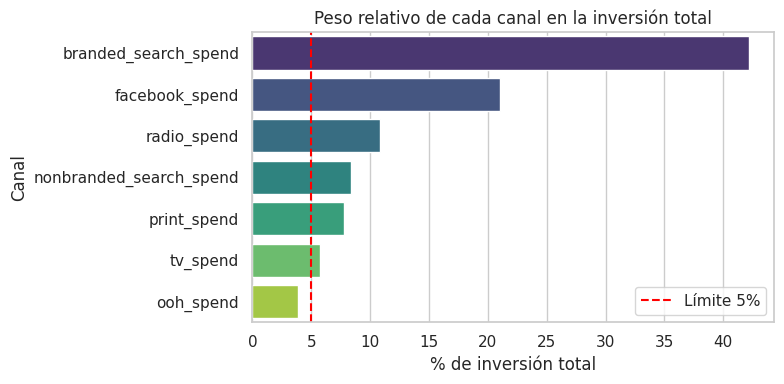

In [ ]:
# ════════════════════════
# ANÁLISIS DE PESO RELATIVO DE LOS CANALES DE PAGO
# ════════════════════════

# ====================================================================================
# 💬 PROMPT ORIGINAL USADO PARA ESTE BLOQUE
#
# "Quiero un bloque de código que calcule cuánto representa cada canal de pago en el
# total invertido, para un análisis de marketing mix modeling. Quiero que sume la
# inversión por canal, calcule el porcentaje relativo, lo muestre en una tabla clara
# y en un gráfico de barras horizontal con los valores ordenados. También quiero que
# se marque una línea roja en el 5% para detectar fácilmente canales con peso bajo.
# El código debe estar bien comentado y estructurado para usar en clase."
# ====================================================================================

# Definimos los medios de pago que estamos utilizando
canales_pago = ["branded_search_spend", "nonbranded_search_spend", "facebook_spend", "print_spend", "ooh_spend", "tv_spend", "radio_spend"]

# Calculamos la inversión total por canal (suma en todo el periodo)
inversion_por_canal = df_modelo[canales_pago].sum()

# Calculamos el total invertido en todos los canales
total_inversion = inversion_por_canal.sum()

# Calculamos el % que representa cada canal
porcentaje_inversion = (inversion_por_canal / total_inversion * 100).sort_values(ascending=False)

# Creamos un DataFrame resumen
df_inversion = pd.DataFrame({
    "inversion_total": inversion_por_canal,
    "porcentaje": porcentaje_inversion
})

# Mostramos la tabla ordenada con formato legible
print("Porcentaje de inversión por canal:")
display(df_inversion.style
        .format({
            "inversion_total": "{:,.2f}".format,   # separador de miles y 2 decimales
            "porcentaje": "{:.2f}%"               # porcentaje con 2 decimales
        }))

# Visualización en gráfico de barras horizontal
plt.figure(figsize=(8, 4))
sns.barplot(
    x=porcentaje_inversion.values,
    y=porcentaje_inversion.index,
    hue=porcentaje_inversion.index,
    palette="viridis",
    dodge=False,                          # Para que no se desplacen las barras
    legend=False                          # Oculta la leyenda innecesaria
)
plt.axvline(5, color="red", linestyle="--", label="Límite 5%")
plt.title("Peso relativo de cada canal en la inversión total")
plt.xlabel("% de inversión total")
plt.ylabel("Canal")
plt.legend()
plt.tight_layout()
plt.show()

Días de diferencia entre observaciones consecutivas:
delta_dias
7.0    259
Name: count, dtype: int64


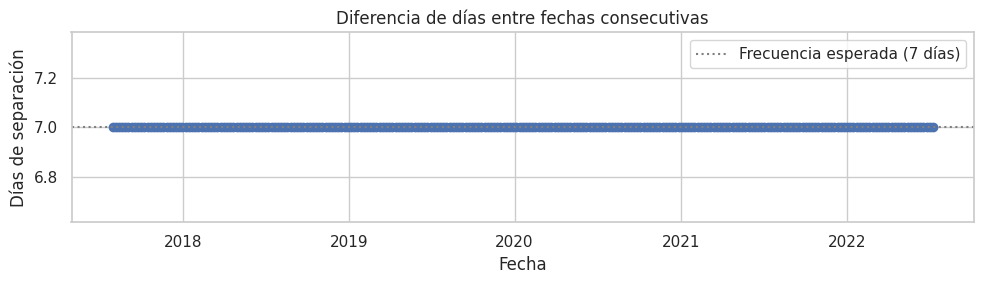

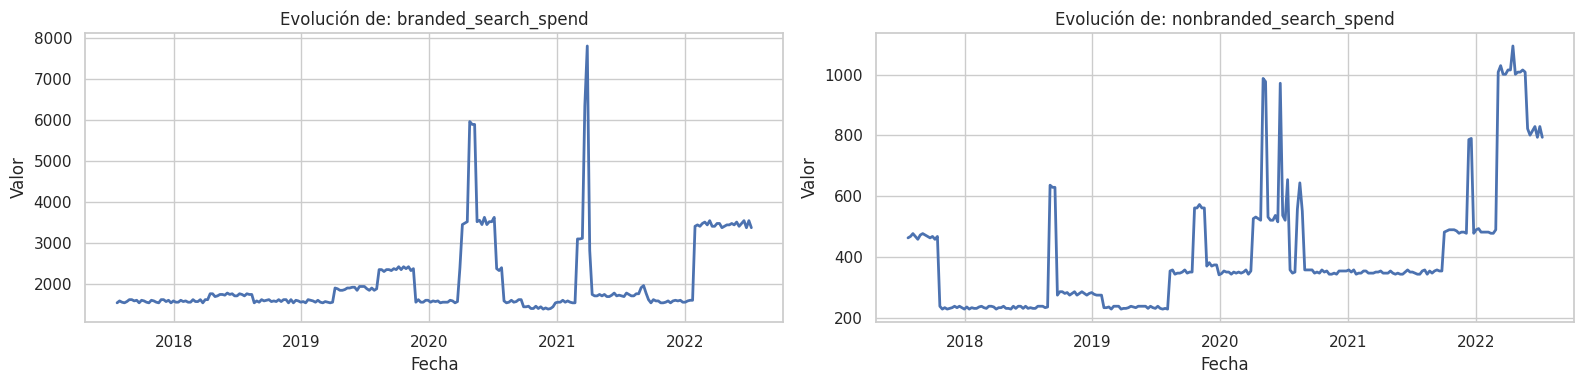

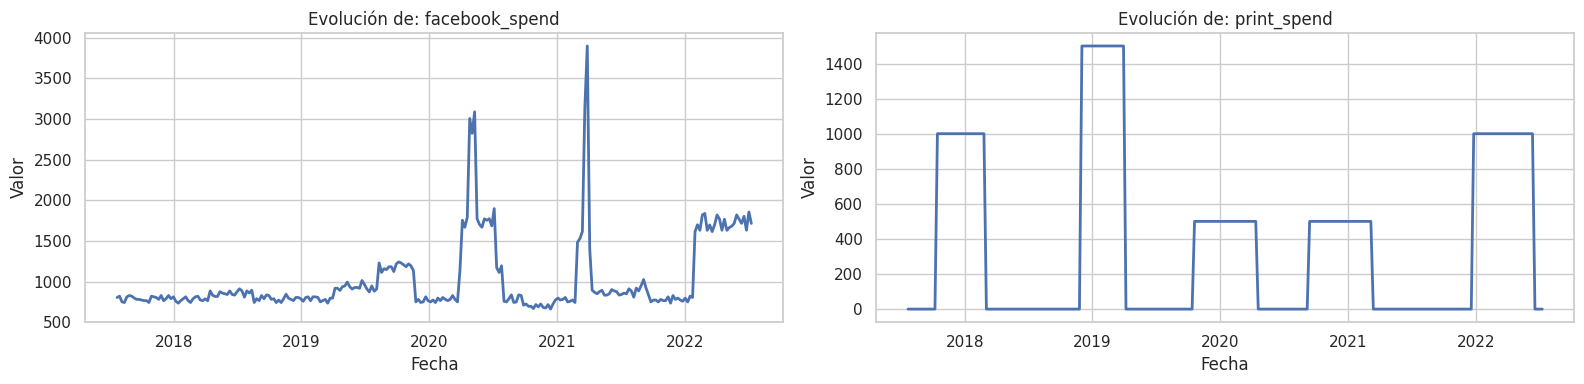

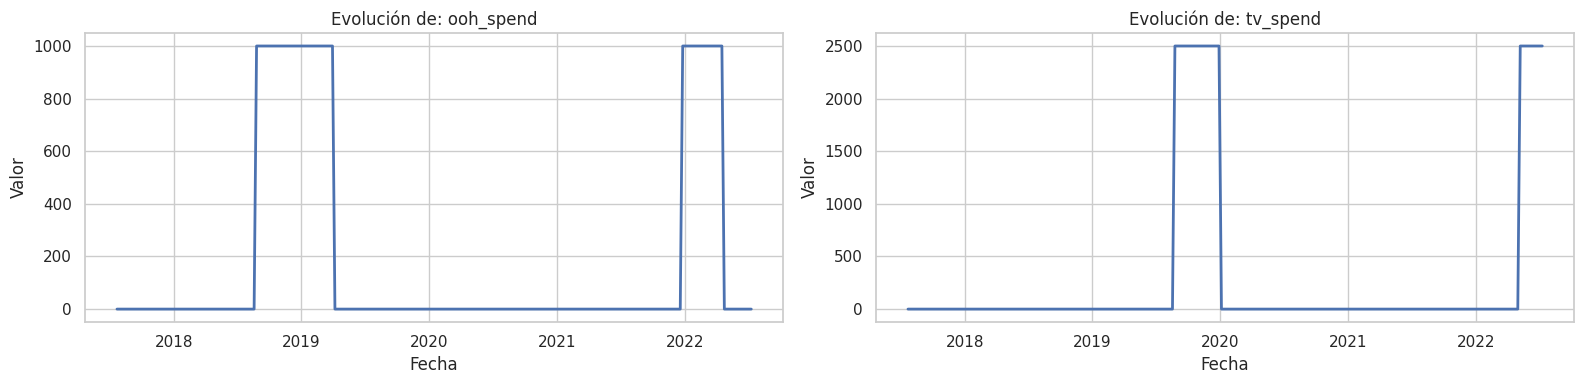

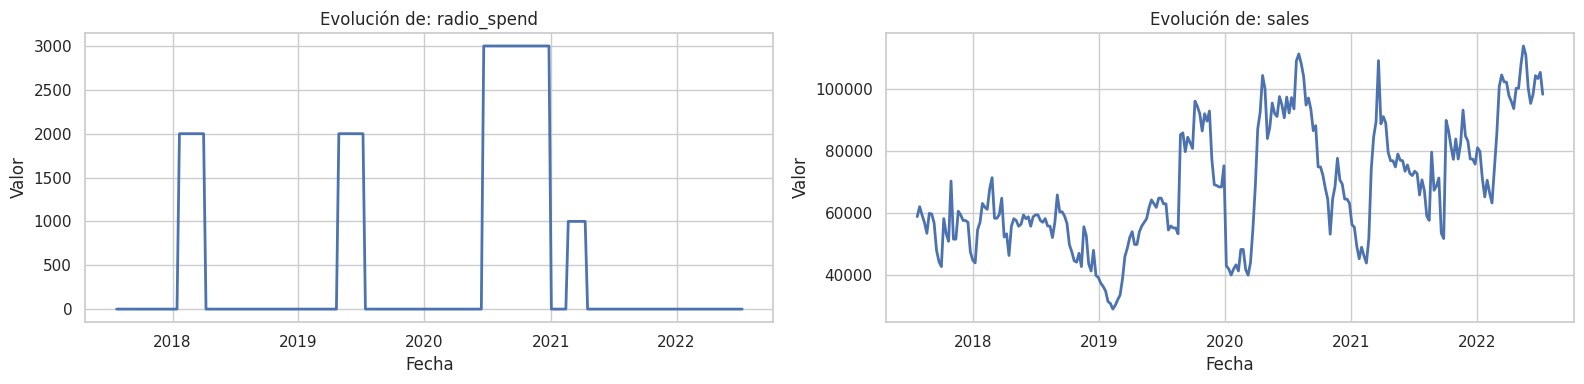

In [ ]:
# ════════════════════════
# ANÁLISIS TEMPORAL
# ════════════════════════

# ====================================================================================
# 💬 PROMPT ORIGINAL USADO PARA ESTE BLOQUE
#
# "Quiero un bloque de código para analizar la dimensión temporal de un dataset de
# marketing mix modeling. Necesito que ordene por fecha, verifique si la frecuencia
# es semanal y lo visualice con un gráfico de diferencias entre fechas. También quiero
# ver la evolución de todas las variables numéricas en el tiempo, organizadas en pares
# (2 gráficos por fila), con gráficos limpios y bien etiquetados. El código debe estar
# muy bien comentado y separado en pasos claros para usarlo en clase o presentaciones."
# ====================================================================================

# 1. Ordenar por fecha
df_modelo = df_modelo.sort_values("Week")

# 2. Comprobar frecuencia (esperamos semanal)
df_modelo["delta_dias"] = df_modelo["Week"].diff().dt.days
print("Días de diferencia entre observaciones consecutivas:")
print(df_modelo["delta_dias"].value_counts().sort_index())

# Visualizar diferencias temporales
plt.figure(figsize=(10, 3))
plt.plot(df_modelo["Week"], df_modelo["delta_dias"], marker="o", linestyle="--")
plt.axhline(7, color="gray", linestyle=":", label="Frecuencia esperada (7 días)")
plt.title("Diferencia de días entre fechas consecutivas")
plt.ylabel("Días de separación")
plt.xlabel("Fecha")
plt.legend()
plt.tight_layout()
plt.show()

# 3. Eliminar columna auxiliar
df_modelo.drop(columns="delta_dias", inplace=True)

# 4. Visualización temporal de variables numéricas (en pares, 2 por fila)

columnas_temporales = df_modelo.select_dtypes(include="number").columns
n = len(columnas_temporales)
filas = math.ceil(n / 2)

for i in range(filas):
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))

    for j in range(2):
        idx = i * 2 + j
        if idx < n:
            col = columnas_temporales[idx]
            ax = axes[j]
            ax.plot(df_modelo["Week"], df_modelo[col], linewidth=2)
            ax.set_title(f"Evolución de: {col}")
            ax.set_xlabel("Fecha")
            ax.set_ylabel("Valor")
        else:
            # Oculta el segundo eje si no hay una segunda variable
            axes[j].axis("off")

    plt.tight_layout()
    plt.show()


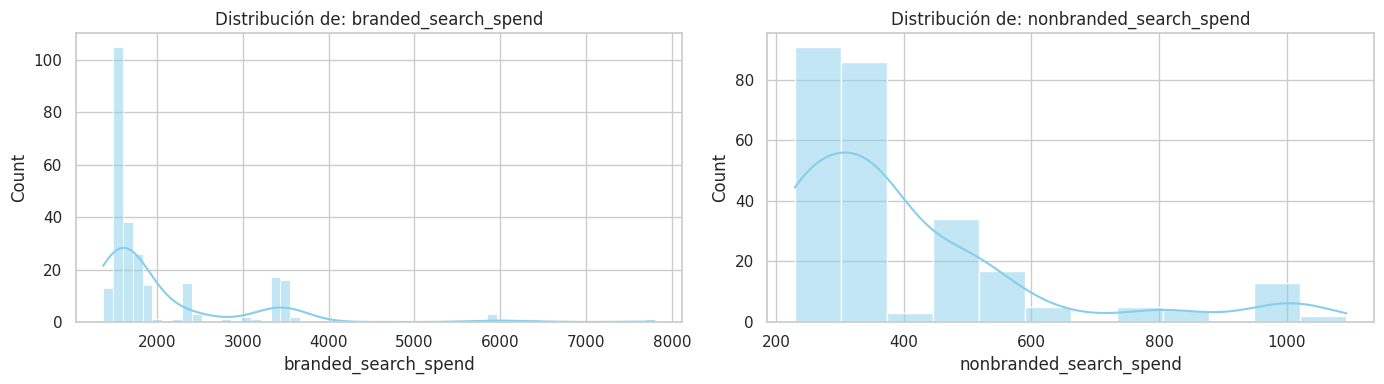

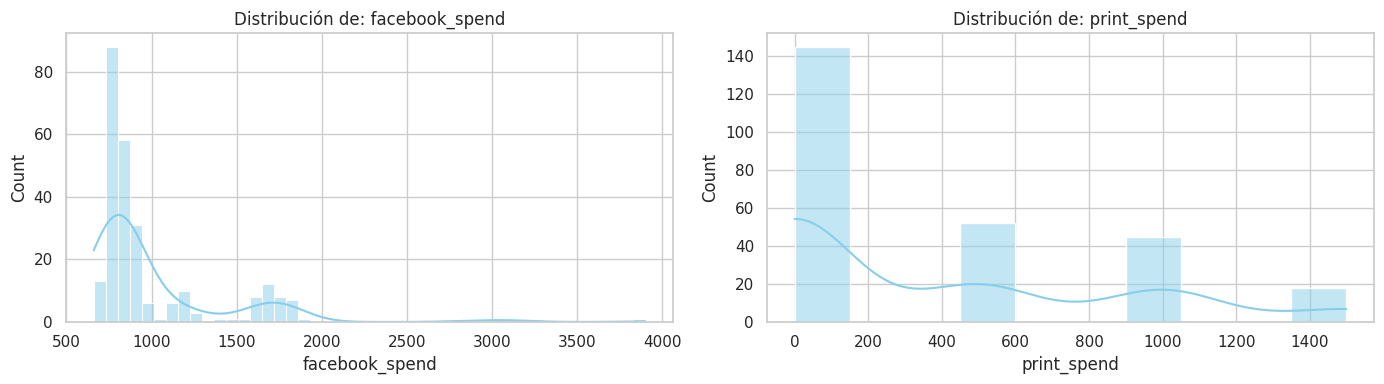

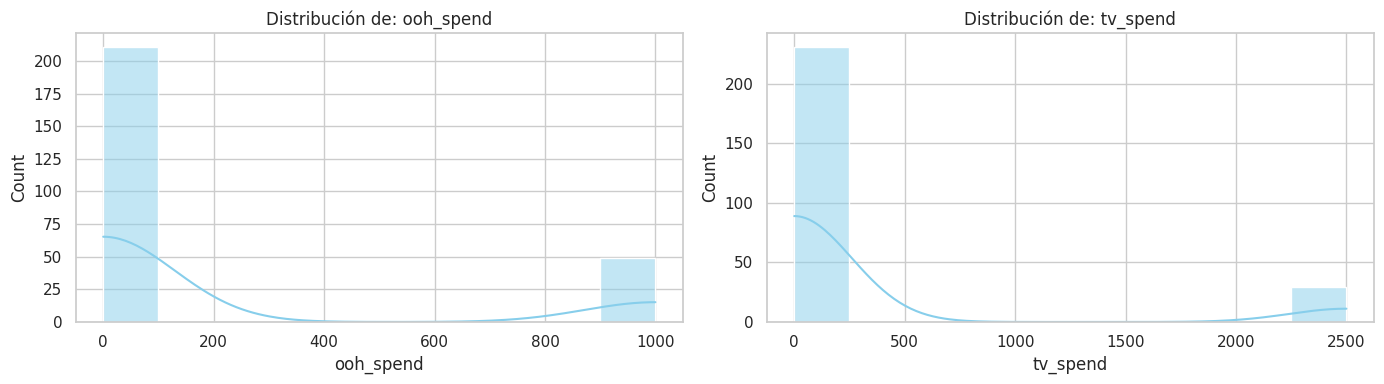

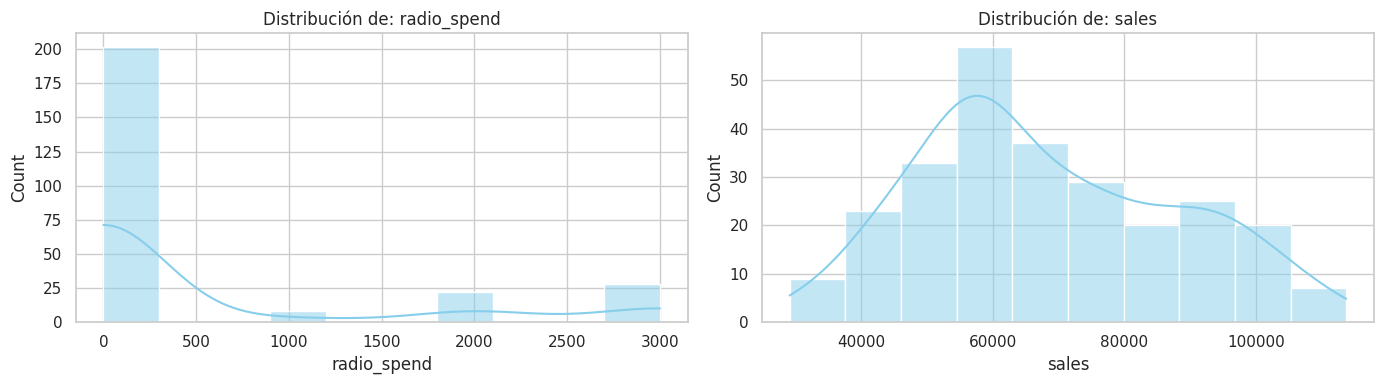

In [ ]:
# ════════════════════════
# DISTRIBUCIÓN DE VARIABLES NUMÉRICAS
# ════════════════════════

# ====================================================================================
# 💬 PROMPT ORIGINAL USADO PARA ESTE BLOQUE
#
# "Quiero un bloque de código para analizar la distribución de las variables numéricas
# en un dataset de marketing mix modeling. No quiero incluir variables binarias como
# 'lluvia', solo variables continuas. Quiero visualizar su distribución mediante histogramas
# con curva KDE, organizados en pares (2 gráficos por fila), con etiquetas limpias y diseño
# claro. El bloque debe estar bien comentado y preparado para usar en un análisis exploratorio
# o presentación formativa."
# ====================================================================================

# Excluimos variables binarias como 'lluvia' y nos centramos en las variables continuas
variables_continuas = [
    col for col in df_modelo.select_dtypes(include="number").columns
    if col != "lluvia"
]

# Mostramos histogramas + KDE en filas de 2 columnas

n = len(variables_continuas)
filas = math.ceil(n / 2)

for i in range(filas):
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    for j in range(2):
        idx = i * 2 + j
        if idx < n:
            col = variables_continuas[idx]
            sns.histplot(df_modelo[col], kde=True, ax=axes[j], color="skyblue")
            axes[j].set_title(f"Distribución de: {col}")
        else:
            axes[j].axis("off")

    plt.tight_layout()
    plt.show()

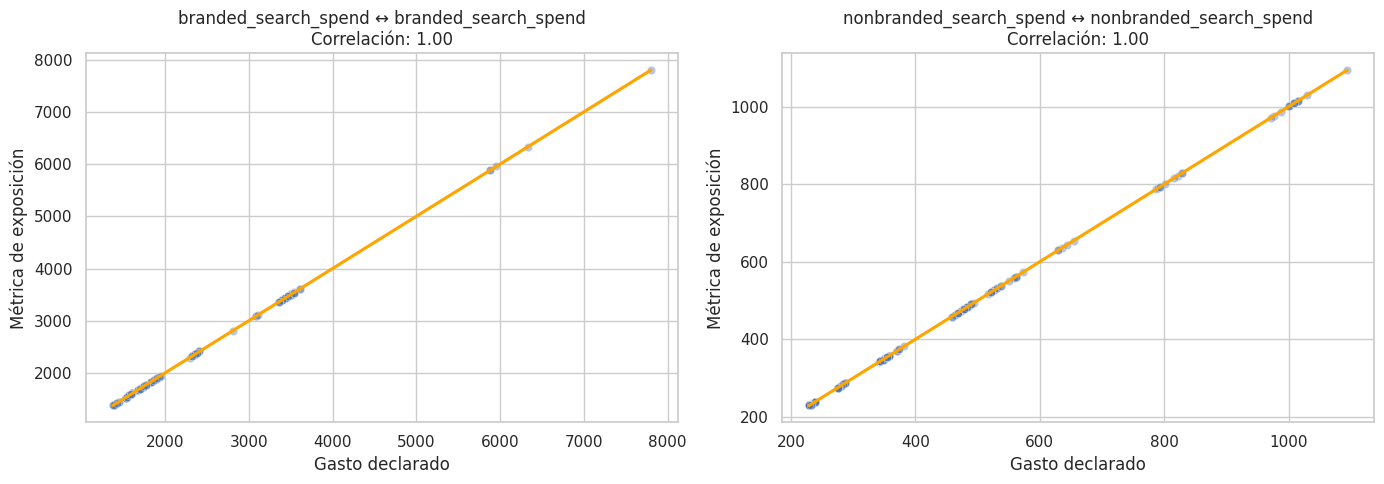

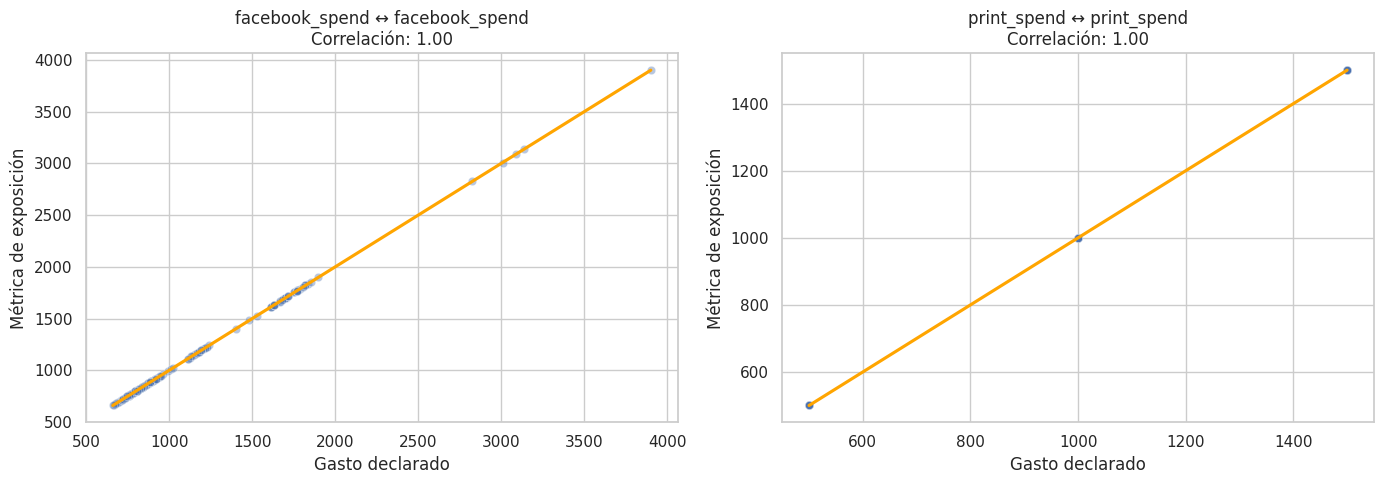

/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


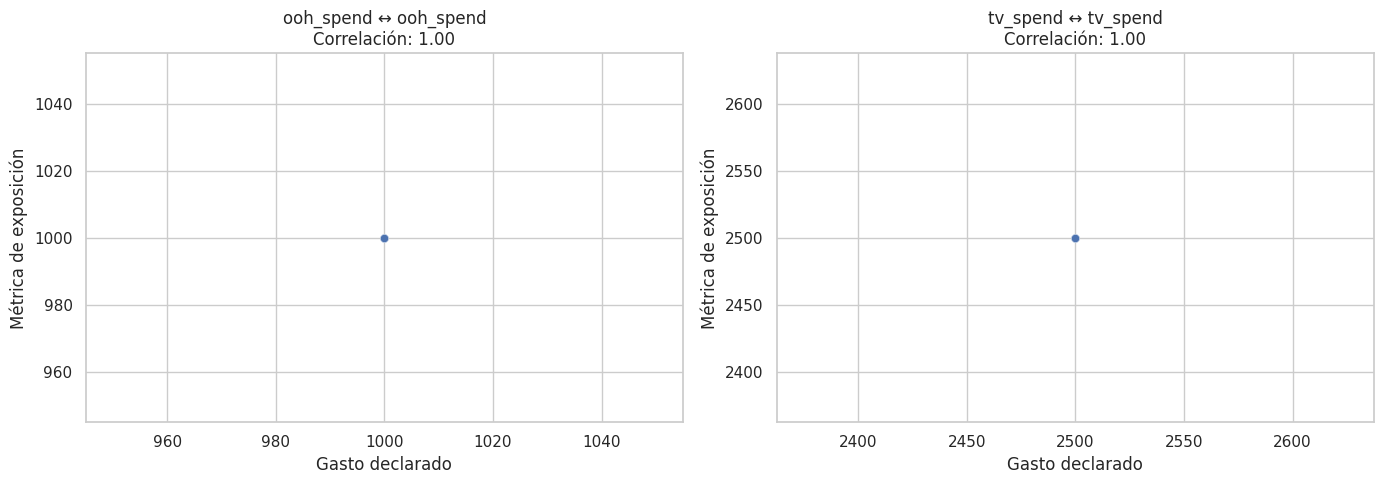

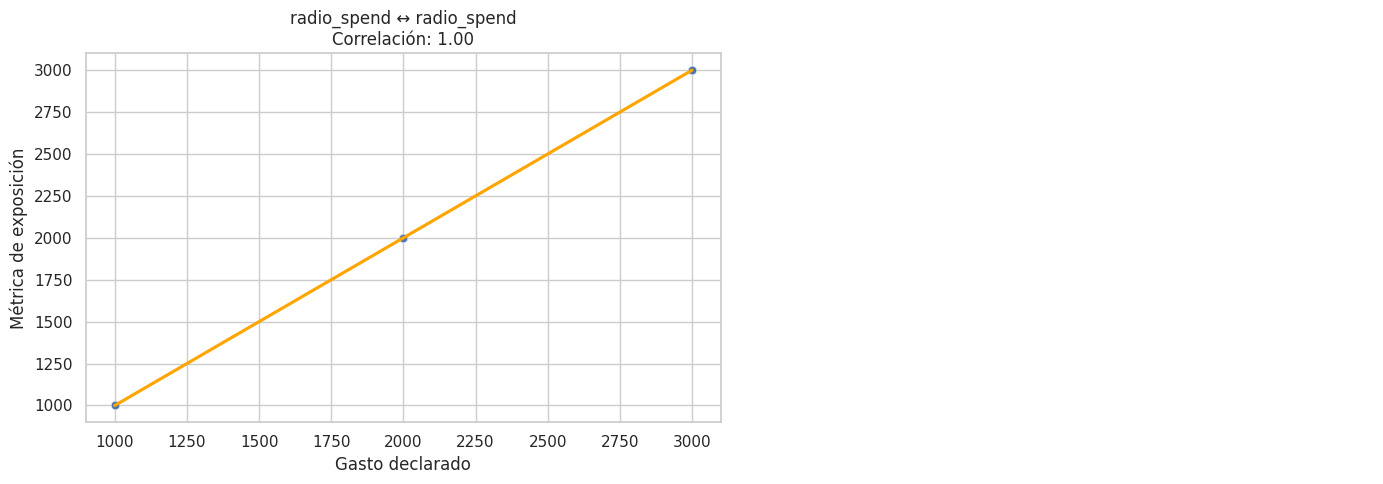

In [ ]:
# ════════════════════════
# ANÁLISIS DE CONSISTENCIA GASTO ↔ MÉTRICA DE EXPOSICIÓN
# ════════════════════════

# ====================================================================================
# 💬 PROMPT ORIGINAL USADO PARA ESTE BLOQUE
#
# "Quiero un bloque de código para analizar la relación entre el gasto de cada canal
# y su propia métrica de exposición, aunque de momento solo tengo el gasto, así que
# usaré la misma variable en ambos ejes. Quiero mostrar un gráfico scatter + LOWESS
# por canal, de dos en dos por fila, y que si hay un número impar de canales no se muestre
# el gráfico vacío del eje sobrante. Quiero que esté todo bien comentado, claro y preparado
# para en un futuro comparar el gasto con métricas reales de exposición si las tuviera."
# ====================================================================================

canales_exposicion = {
    "branded_search_spend": "branded_search_spend",
    "nonbranded_search_spend": "nonbranded_search_spend",
    "facebook_spend": "facebook_spend",
    "print_spend": "print_spend",
    "ooh_spend": "ooh_spend",
    "tv_spend": "tv_spend",
    "radio_spend": "radio_spend",
}

n = len(canales_exposicion)
filas = math.ceil(n / 2)

i = 0
for canal, exposicion in canales_exposicion.items():
    # Creamos nuevos ejes cada 2 canales
    if i % 2 == 0:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        axes = axes if isinstance(axes, np.ndarray) else [axes]

    idx_local = i % 2
    ax = axes[idx_local]

    df_plot = df_modelo[[canal]].dropna()
    df_plot = df_plot[df_plot[canal] > 0]

    if not df_plot.empty:
        sns.scatterplot(data=df_plot, x=canal, y=canal, ax=ax, alpha=0.4)
        sns.regplot(data=df_plot, x=canal, y=canal, ax=ax, scatter=False, lowess=True, color="orange")

        corr = 1.00  # relación perfecta (misma variable)
        ax.set_title(f"{canal} ↔ {canal}\nCorrelación: {corr:.2f}")
        ax.set_xlabel("Gasto declarado")
        ax.set_ylabel("Métrica de exposición")
    else:
        ax.set_title(f"{canal} sin valores > 0")
        ax.axis("off")

    # Si estamos en un número impar y es el último canal, oculta el eje sobrante
    if idx_local == 0 and i == len(canales_exposicion) - 1:
        axes[1].axis("off")

    # Mostrar el gráfico cada dos canales o en la última iteración
    if idx_local == 1 or i == len(canales_exposicion) - 1:
        plt.tight_layout()
        plt.show()

    i += 1

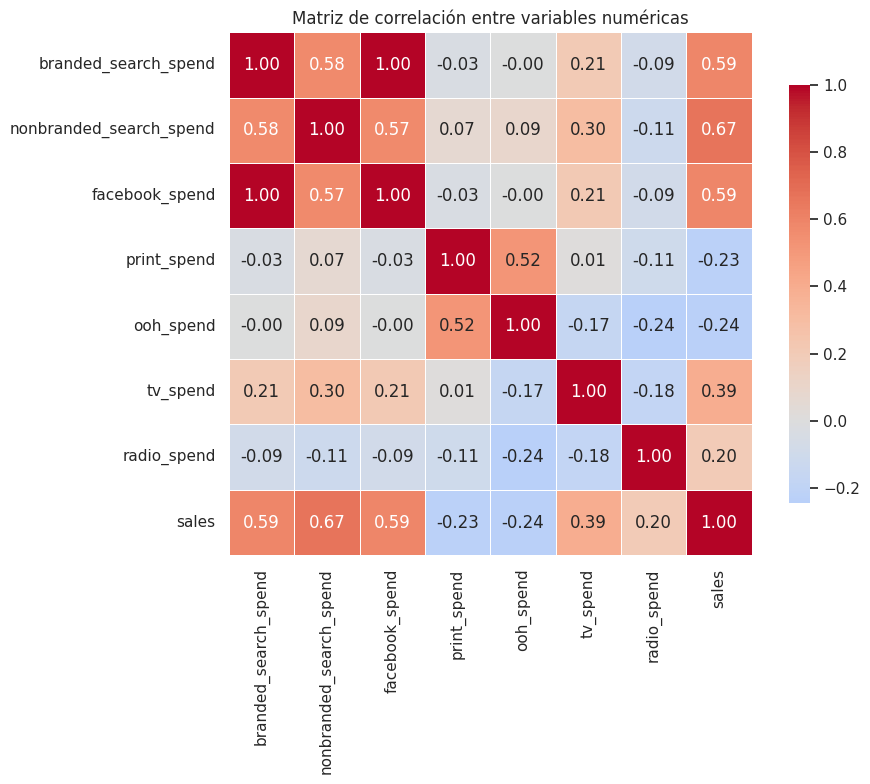


Correlación de las variables con el target: sales


,correlación
nonbranded_search_spend,0.666117
branded_search_spend,0.588992
facebook_spend,0.587216
tv_spend,0.393860
radio_spend,0.198385
print_spend,-0.228140
ooh_spend,-0.235758



⚠️ Pairs con correlación > 0.8:


,Var1,Var2,Correlación
1,branded_search_spend,facebook_spend,0.996863


In [ ]:
# ════════════════════════
# ANÁLISIS DE CORRELACIONES
# ════════════════════════

# ====================================================================================
# 💬 PROMPT ORIGINAL USADO PARA ESTE BLOQUE
#
# "Quiero un bloque de código completo para analizar las correlaciones entre variables
# numéricas en un dataset de marketing mix modeling. Quiero que calcule la matriz de
# correlación y la visualice con un heatmap bien presentado. Además, que calcule la
# correlación de cada variable con la variable objetivo y la muestre en tabla ordenada.
# También quiero que detecte pares de variables altamente correlacionadas entre sí
# (por encima de 0.8) para controlar multicolinealidad, excluyendo el target. Que esté
# todo bien comentado y listo para usar en una presentación de EDA o clase."
# ====================================================================================

# Seleccionamos solo variables numéricas
variables_numericas = df_modelo.select_dtypes(include="number").columns

# Calculamos la matriz de correlación de Pearson
matriz_corr = df_modelo[variables_numericas].corr()

# Visualizamos el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    matriz_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()

# ----------------------------------------
# Correlación con la variable objetivo
# ----------------------------------------

# Calculamos la correlación de todas las variables con el target
target = "sales"
correlacion_target = matriz_corr[target].drop(target).sort_values(ascending=False)

# Mostramos la tabla ordenada
print(f"\nCorrelación de las variables con el target: {target}")
display(correlacion_target.to_frame(name="correlación"))

# ----------------------------------------
# Mostrar pares altamente correlacionados entre sí
# ----------------------------------------

# Umbral para considerar multicolinealidad fuerte
umbral_alto = 0.8

# Extraemos pares de variables con alta correlación
corr_pairs = (
    matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ["Var1", "Var2", "Correlación"]

# Filtramos los pares con correlación alta y que NO incluyan el target
corr_altas = corr_pairs[
    (abs(corr_pairs["Correlación"]) >= umbral_alto) &
    (~corr_pairs["Var1"].isin([target])) &
    (~corr_pairs["Var2"].isin([target]))
].sort_values(by="Correlación", ascending=False)

if not corr_altas.empty:
    print(f"\n⚠️ Pairs con correlación > {umbral_alto}:")
    display(corr_altas)
else:
    print(f"\n✅ No se encontraron pares altamente correlacionados entre predictores (>{umbral_alto}).")


Análisis de multicolinealidad (VIF):


,variable,VIF
1,branded_search_spend,161.18
3,facebook_spend,160.46
2,nonbranded_search_spend,1.62
5,ooh_spend,1.56
4,print_spend,1.39
6,tv_spend,1.23
7,radio_spend,1.13


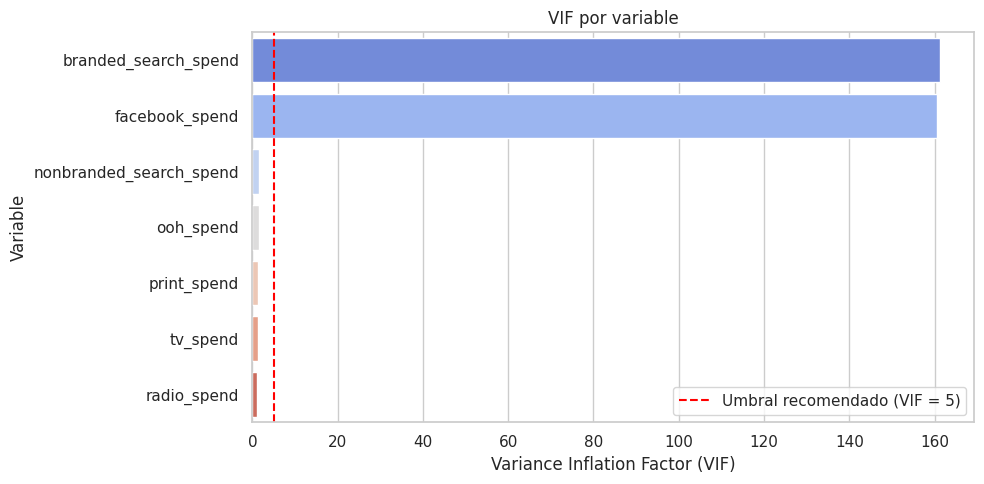


🔎 Análisis de correlaciones para: branded_search_spend (VIF = 161.18)
Variables más correlacionadas:


,Correlación
facebook_spend,0.996863



🔎 Análisis de correlaciones para: facebook_spend (VIF = 160.46)
Variables más correlacionadas:


,Correlación
branded_search_spend,0.996863


In [ ]:
# ════════════════════════
# ANÁLISIS DE MULTICOLINEALIDAD CON VIF Y CORRELACIONES
# ════════════════════════

# ====================================================================================
# 💬 PROMPT ORIGINAL USADO PARA ESTE BLOQUE
#
# "Quiero un bloque de código para calcular el VIF solo de las variables que compiten
# por crédito en un modelo de marketing mix modeling. Quiero excluir variables de contexto
# como 'busquedas_google' y 'lluvia', pero mantener variables sin inversión directa como 'emails'.
# El bloque debe calcular el VIF, mostrar una tabla ordenada, generar un gráfico de barras
# con los valores y destacar las variables que superen el umbral de 5.
# Además, quiero que para cada variable con VIF alto se muestren las variables con las que
# tiene correlaciones superiores a 0.6, para poder identificar el origen del problema.
# Todo debe estar en un único bloque, bien comentado y claro para usar en clases o documentación."
# ====================================================================================

# Variables predictoras que compiten por crédito (se excluyen métricas de contexto como 'busquedas_google')
variables_vif = ["branded_search_spend", "nonbranded_search_spend", "facebook_spend", "print_spend", "ooh_spend", "tv_spend", "radio_spend"]

# Creamos el dataframe de predictores sin nulos
X = df_modelo[variables_vif].dropna().copy()

# Añadimos constante (necesaria para cálculo del VIF)
X_const = add_constant(X)

# Calculamos el VIF
vif_data = pd.DataFrame()
vif_data["variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Eliminamos la constante y ordenamos
vif_data = vif_data[vif_data["variable"] != "const"]
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Mostramos la tabla
print("Análisis de multicolinealidad (VIF):")
display(vif_data.style.format({"VIF": "{:.2f}"}))

# Visualización
plt.figure(figsize=(10, 5))
sns.barplot(
    data=vif_data,
    x="VIF",
    y="variable",
    hue="variable",
    palette="coolwarm",
    dodge=False,
    legend=False               # Evita que aparezca una leyenda redundante
)
plt.axvline(5, color="red", linestyle="--", label="Umbral recomendado (VIF = 5)")
plt.title("VIF por variable")
plt.xlabel("Variance Inflation Factor (VIF)")
plt.ylabel("Variable")
plt.legend()
plt.tight_layout()
plt.show()

# ========================
# DIAGNÓSTICO DE VARIABLES CON VIF ALTO
# ========================

# Umbral de alerta
umbral_vif = 5
variables_con_vif_alto = vif_data[vif_data["VIF"] > umbral_vif]["variable"].tolist()

# Calculamos matriz de correlación entre predictores relevantes
matriz_corr_predictoras = df_modelo[variables_vif].corr()

# Analizamos correlaciones significativas para cada variable con VIF alto
for var in variables_con_vif_alto:
    print(f"\n🔎 Análisis de correlaciones para: {var} (VIF = {vif_data[vif_data['variable'] == var]['VIF'].values[0]:.2f})")

    correlaciones = matriz_corr_predictoras[var].drop(var).sort_values(key=abs, ascending=False)
    top_corr = correlaciones[abs(correlaciones) > 0.6]

    if not top_corr.empty:
        print("Variables más correlacionadas:")
        display(top_corr.to_frame(name="Correlación"))
    else:
        print("✅ No hay correlaciones superiores a 0.6 con ninguna otra variable.")

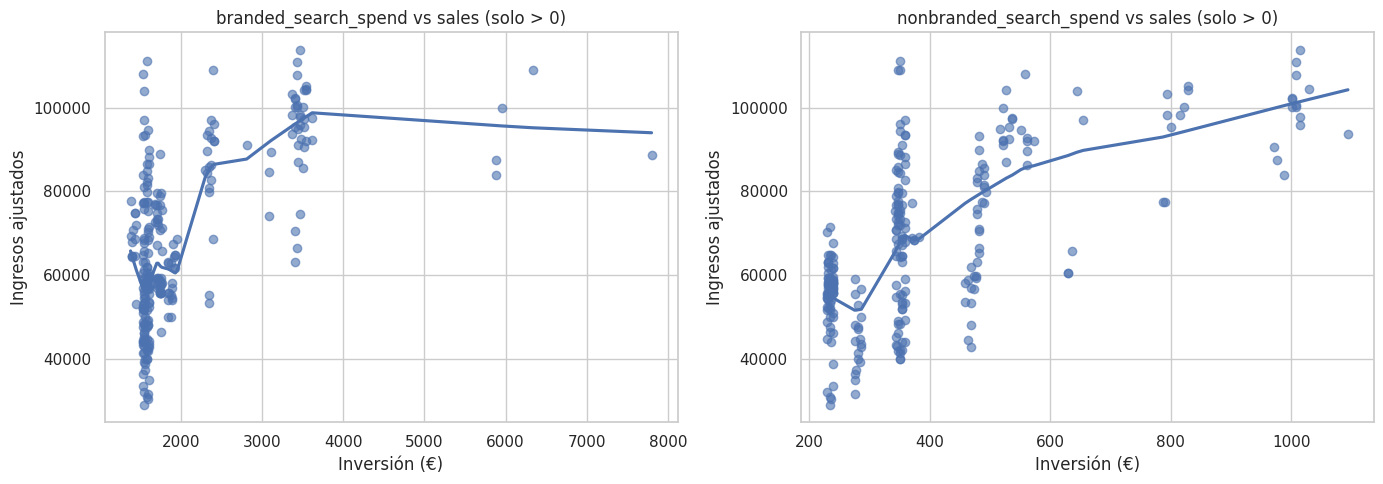

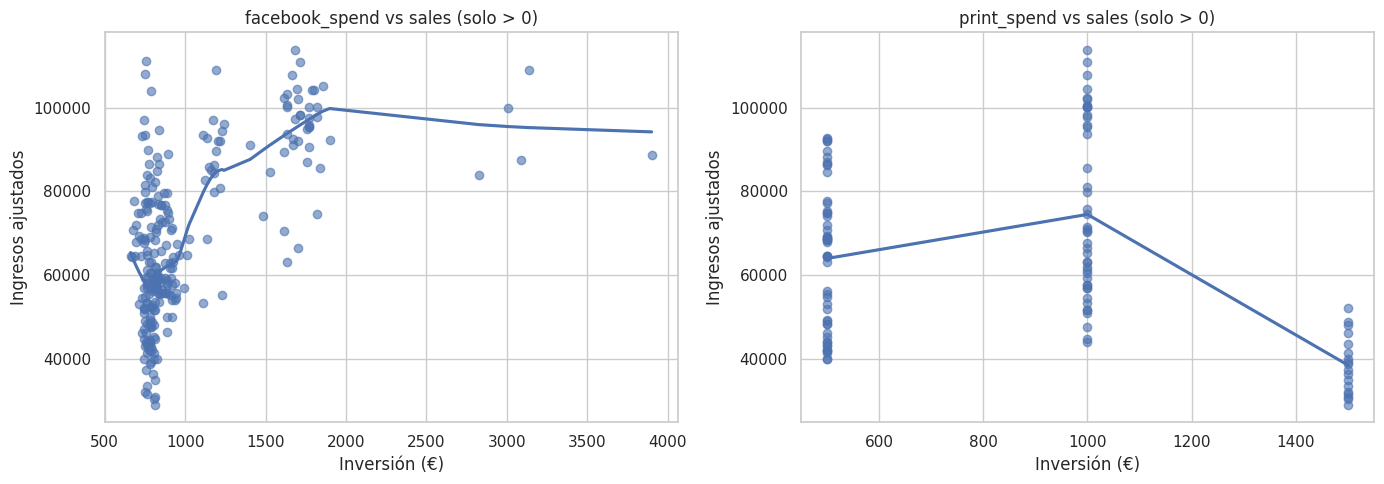

/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


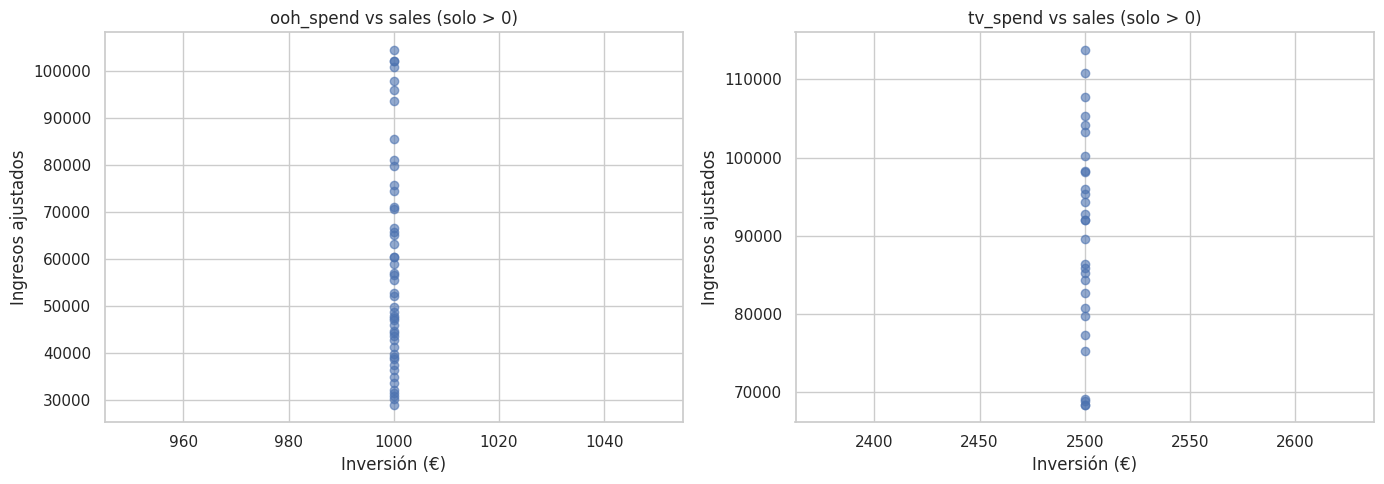

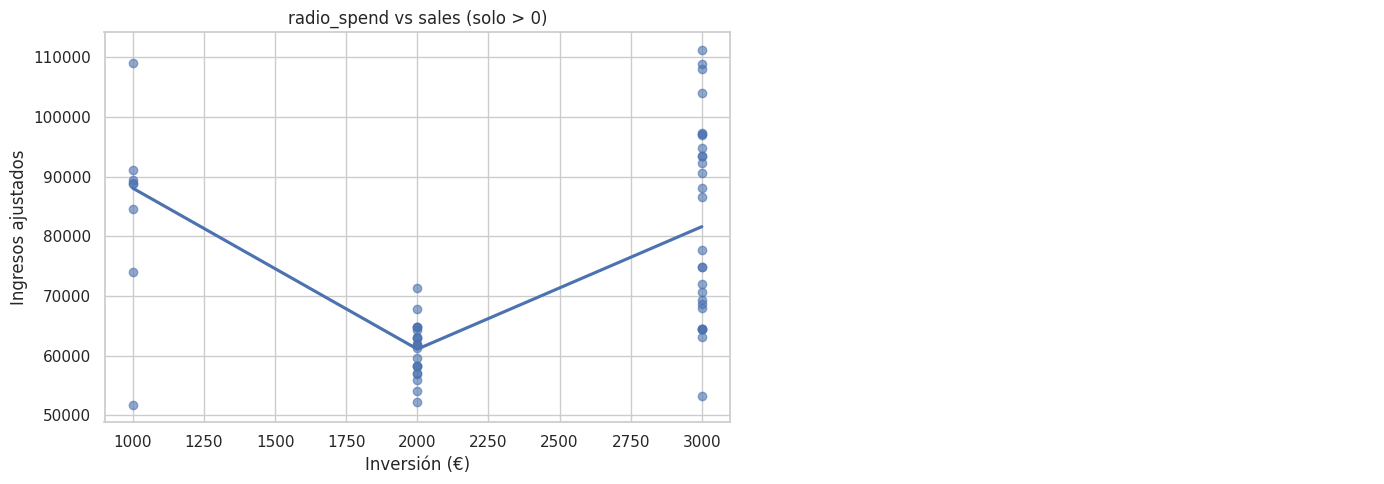

In [ ]:
# ════════════════════════
# RELACIÓN INVERSIÓN vs INGRESOS
# ════════════════════════

# ====================================================================================
# 💬 PROMPT ORIGINAL USADO PARA ESTE BLOQUE
#
# "Quiero un bloque de código para analizar si existe saturación en los canales de
# inversión dentro de un dataset de marketing mix modeling. Para ello, quiero visualizar
# la relación entre la inversión de cada canal y los ingresos totales ajustados,
# excluyendo los valores cero. Quiero usar scatterplots con línea de regresión suavizada
# (LOWESS) y mostrar los gráficos en pares (2 por fila), con etiquetas claras y diseño limpio.
# El bloque debe estar bien comentado, ideal para incluir en una exploración de EDA o formación."
# ====================================================================================

# Definimos los canales de inversión que queremos analizar
canales_inversion = ["branded_search_spend", "nonbranded_search_spend", "facebook_spend", "print_spend", "ooh_spend", "tv_spend", "radio_spend"]
target = "sales"

import math

n = len(canales_inversion)
filas = math.ceil(n / 2)

for i in range(filas):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    for j in range(2):
        idx = i * 2 + j
        if idx < n:
            canal = canales_inversion[idx]
            ax = axes[j]

            # Filtramos filas donde el canal tiene valor 0 o nulo
            df_filtrado = df_modelo[df_modelo[canal] > 0]

            sns.regplot(
                x=df_filtrado[canal],
                y=df_filtrado[target],
                scatter_kws={"alpha": 0.6},
                lowess=True,
                ax=ax
            )
            ax.set_title(f"{canal} vs {target} (solo > 0)")
            ax.set_xlabel("Inversión (€)")
            ax.set_ylabel("Ingresos ajustados")
        else:
            axes[j].axis("off")

    plt.tight_layout()
    plt.show()



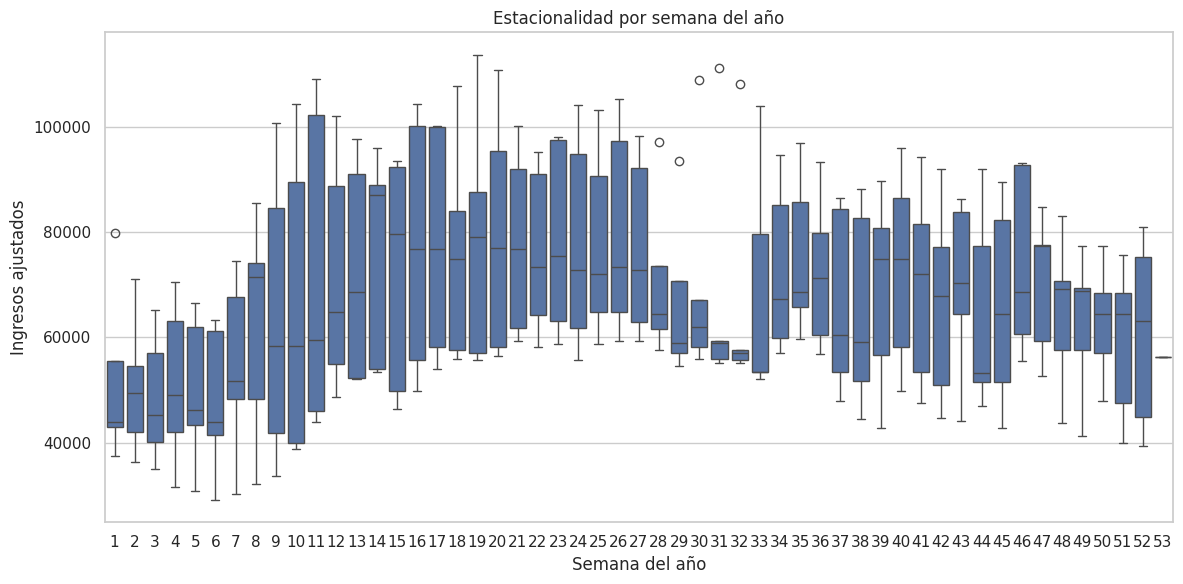

In [ ]:
# ════════════════════════
# ANÁLISIS DE ESTACIONALIDAD SEMANAL
# ════════════════════════

# ====================================================================================
# 💬 PROMPT ORIGINAL USADO PARA ESTE BLOQUE
#
# "Quiero un bloque de código para visualizar la estacionalidad de los ingresos en un
# dataset semanal de marketing mix modeling. Quiero extraer la semana y el año de la
# columna de fecha, y luego generar un gráfico de boxplot por semana del año que muestre
# la distribución de ingresos ajustados. Debe estar bien comentado, visualmente claro
# y útil para detectar patrones estacionales recurrentes en el tiempo."
# ====================================================================================

# Extraer semana y año si quieres visualizar efectos estacionales
df_modelo["semana"] = df_modelo["Week"].dt.isocalendar().week
df_modelo["año"] = df_modelo["Week"].dt.year

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_modelo, x="semana", y="sales")
plt.title("Estacionalidad por semana del año")
plt.xlabel("Semana del año")
plt.ylabel("Ingresos ajustados")
plt.tight_layout()
plt.show()


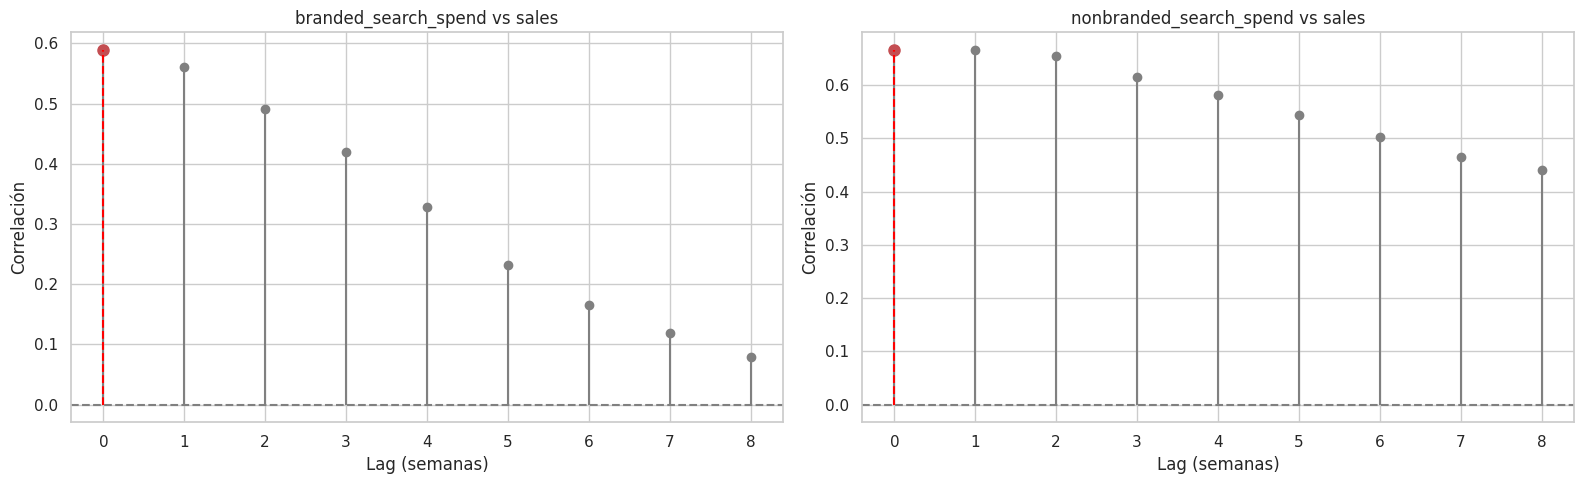

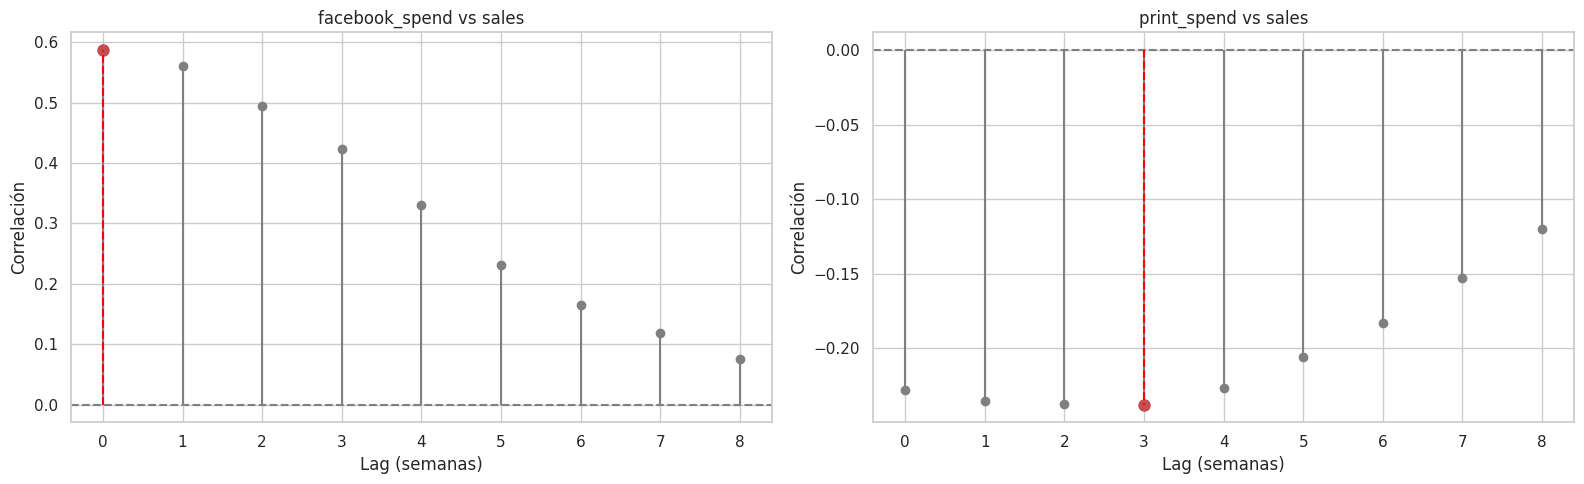

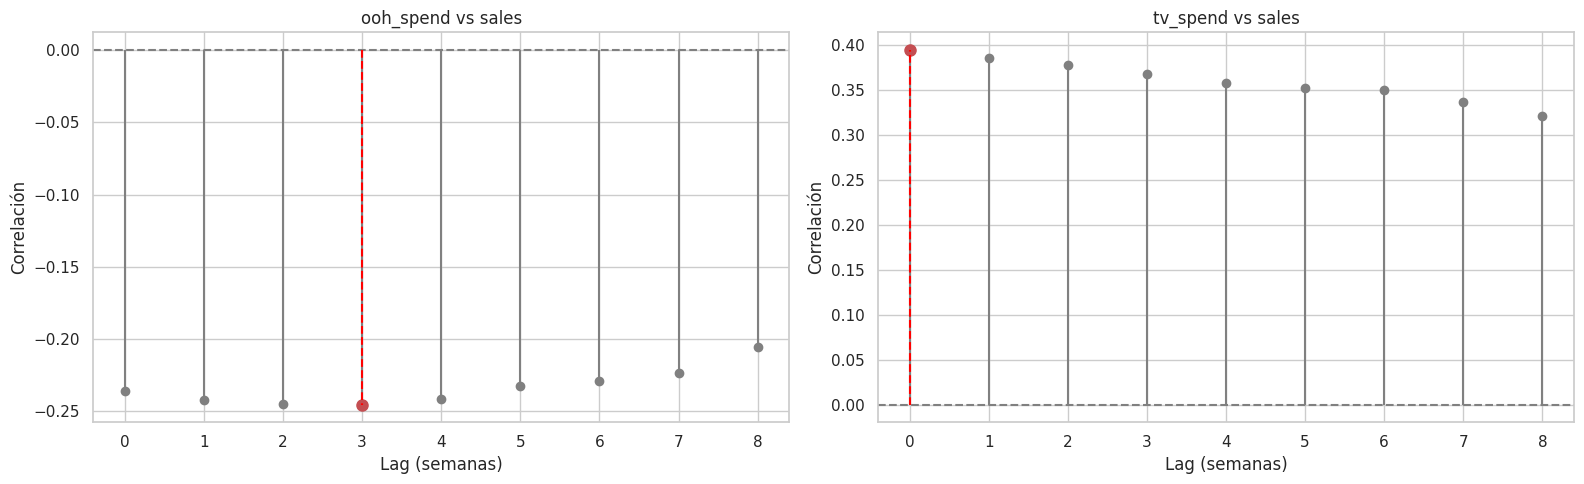

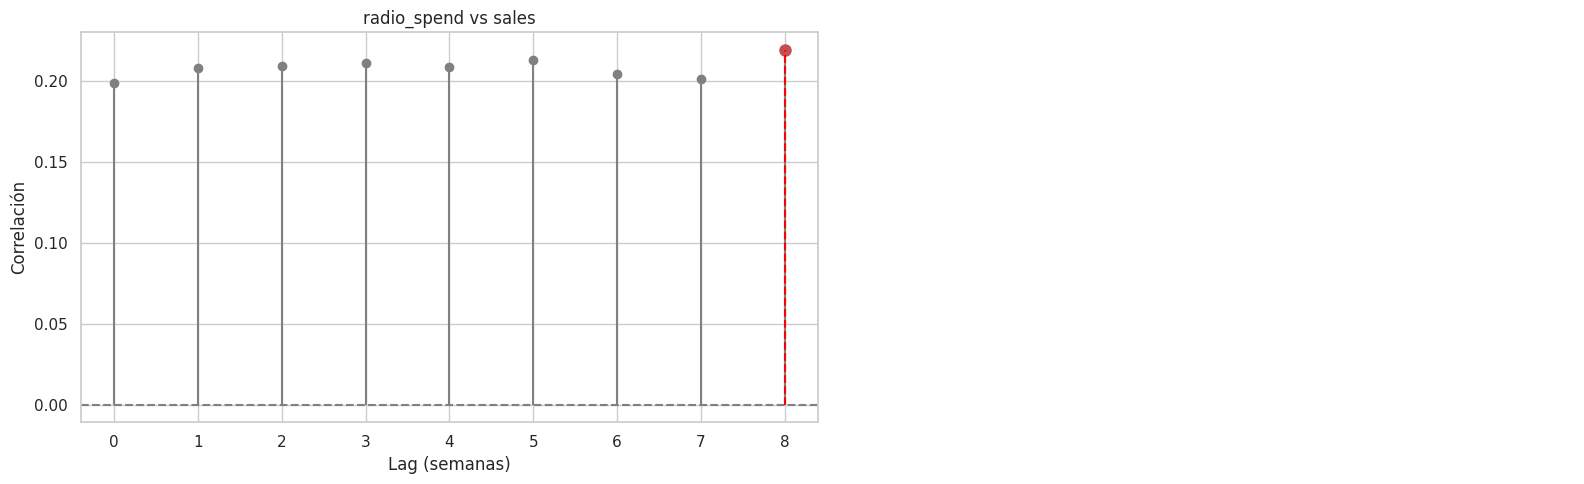

In [ ]:
# ════════════════════════
# ANÁLISIS DE LAGS ENTRE INVERSIÓN Y VENTAS
# ════════════════════════

# ====================================================================================
# 💬 PROMPT ORIGINAL USADO PARA ESTE BLOQUE
#
# "Quiero un bloque de código para analizar los posibles lags entre inversión publicitaria
# y ventas en un dataset de marketing mix modeling. Quiero calcular la correlación cruzada
# (cross-correlation function, CCF) entre cada canal de inversión y los ingresos ajustados,
# usando hasta 8 semanas de lag. Quiero que se visualicen los resultados en gráficos de tipo
# stem plot, dos por fila, y que se destaque en rojo el o los lags con mayor correlación
# absoluta. El código no debe hacer interpretaciones automáticas, solo mostrar el resultado
# de forma clara y comentada."
# ====================================================================================

canales_inversion = ["branded_search_spend", "nonbranded_search_spend", "facebook_spend", "print_spend", "ooh_spend", "tv_spend", "radio_spend"]
target = "sales"
max_lag = 8

n = len(canales_inversion)
filas = math.ceil(n / 2)

for i in range(filas):
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    for j in range(2):
        idx = i * 2 + j
        if idx < len(canales_inversion):
            canal = canales_inversion[idx]
            ax = axes[j]

            # Preprocesamiento: centrar las series
            x = df_modelo[canal] - df_modelo[canal].mean()
            y = df_modelo[target] - df_modelo[target].mean()

            # Calcular correlaciones cruzadas
            correlaciones = ccf(x, y)[:max_lag + 1]
            lags = np.arange(0, max_lag + 1)

            # Detectar lags con correlación absoluta máxima
            max_abs_corr = np.max(np.abs(correlaciones))
            lags_maximos = lags[np.isclose(np.abs(correlaciones), max_abs_corr)]

            # Visualizar correlaciones
            ax.stem(lags, correlaciones, basefmt=" ", linefmt="gray", markerfmt="o")
            ax.axhline(0, color="gray", linestyle="--")

            # Marcar en rojo los lags de máxima correlación
            for lag in lags_maximos:
                corr = correlaciones[lag]
                ax.plot(lag, corr, 'ro', markersize=8)
                ax.vlines(lag, 0, corr, colors="red", linestyles="--")

            # Etiquetas
            ax.set_title(f"{canal} vs {target}")
            ax.set_xlabel("Lag (semanas)")
            ax.set_ylabel("Correlación")

        else:
            axes[j].axis("off")

    plt.tight_layout()
    plt.show()


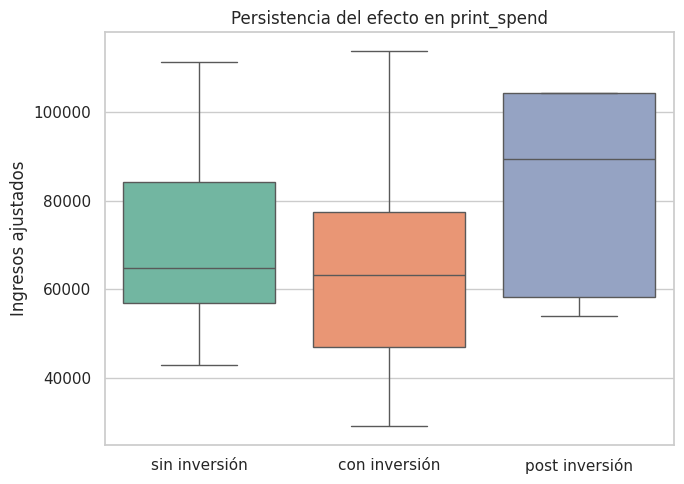

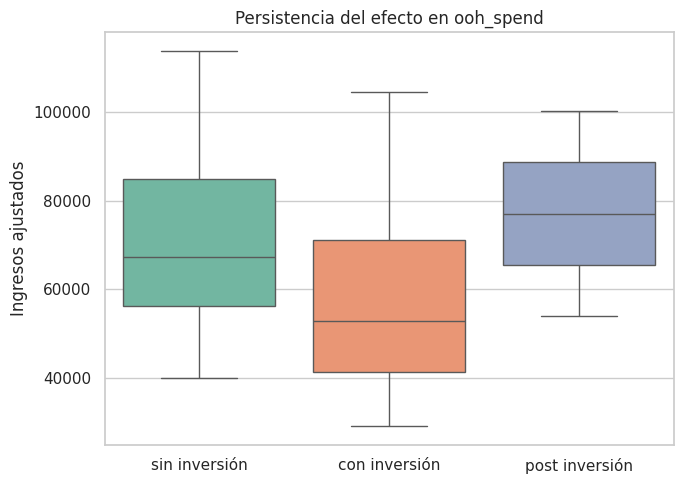

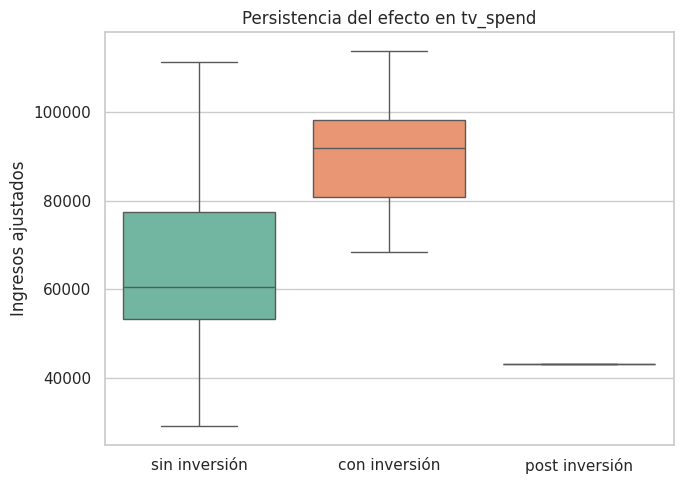

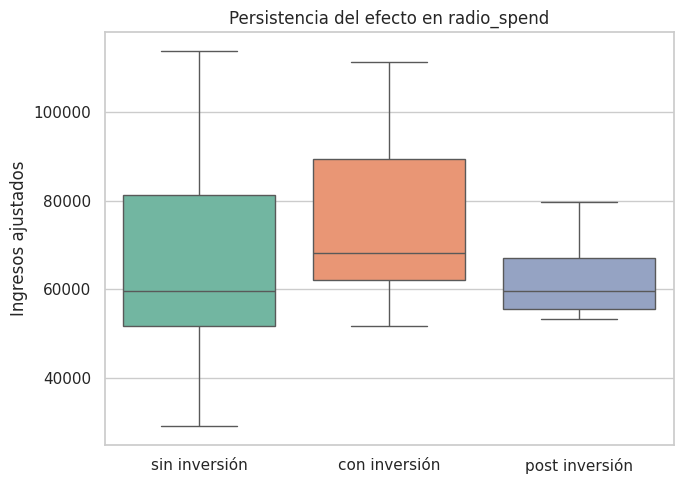

In [ ]:
# ════════════════════════
# ANÁLISIS DE PERSISTENCIA
# ════════════════════════

# ====================================================================================
# 💬 PROMPT ORIGINAL USADO PARA ESTE BLOQUE
#
# "Quiero un bloque de código para analizar la persistencia del impacto de un canal
# de inversión en un modelo de marketing mix modeling. Quiero comparar los ingresos
# durante las semanas con inversión, las semanas posteriores a cortar inversión
# (post inversión), y las semanas sin inversión en absoluto. El análisis debe incluir
# un boxplot por canal mostrando estas tres condiciones y calcular estadísticas
# descriptivas, incluyendo la relación entre ingresos post inversión y sin inversión.
# El bloque debe estar muy bien comentado, ideal para documentar este tipo de efecto."
# ====================================================================================

canales = ["branded_search_spend", "nonbranded_search_spend", "facebook_spend", "print_spend", "ooh_spend", "tv_spend", "radio_spend"]
target = "sales"
resumen_persistencia = []

for canal in canales:
    df_temp = df_modelo[["Week", canal, target]].copy()
    df_temp["condición"] = "sin inversión"
    df_temp.loc[df_temp[canal] > 0, "condición"] = "con inversión"

    # Creamos columna de inversión anterior
    df_temp["inv_anterior"] = df_temp[canal].shift(1)

    # Semana sin inversión justo después de una con inversión
    df_temp["condición"] = df_temp.apply(
        lambda row: "post inversión" if row[canal] == 0 and row["inv_anterior"] > 0 else row["condición"],
        axis=1
    )

    condiciones_validas = ["con inversión", "post inversión", "sin inversión"]
    resumen = df_temp[df_temp["condición"].isin(condiciones_validas)]

    # Solo graficar si hay observaciones suficientes en cada grupo
    condiciones_presentes = resumen["condición"].value_counts()
    if set(condiciones_validas).issubset(condiciones_presentes.index):
        plt.figure(figsize=(7, 5))
        sns.boxplot(
            x="condición",
            y=target,
            hue="condición",
            data=resumen,
            palette="Set2",
            legend=False
        )
        plt.title(f"Persistencia del efecto en {canal}")
        plt.ylabel("Ingresos ajustados")
        plt.xlabel("")
        plt.tight_layout()
        plt.show()

        # Estadísticos resumidos
        stats = resumen.groupby("condición")[target].agg(["mean", "std"]).T
        stats["canal"] = canal
        stats["relación_post_vs_sin"] = (
            stats["post inversión"] / stats["sin inversión"] - 1
        )
        resumen_persistencia.append(stats)
